In [1]:
import numpy as np
import pandas as pd
import glob as gb
import re
import matplotlib.pyplot as plt
import pprint as pp
import os
from scipy import signal
%matplotlib inline

# Enable zooming on plots
# import mpld3
# mpld3.enable_notebook()

In [1]:
# Dataframe initialise
files = gb.glob('./Spectrum/*.txt')
# files = sorted(files, key=lambda x: int(x[12:-4]))

# Add file names
sample=[]
num=[]
for f in files:
    samp = os.path.split(f)[1]
    samp = samp[:-4]
    sample.append(samp)
    num.append(samp[1:])


df = pd.DataFrame({ 'Series': 'T',
                    'Number': num,
                  }, index=sample)

df.head()

NameError: name 'gb' is not defined

# Plot Spectrum

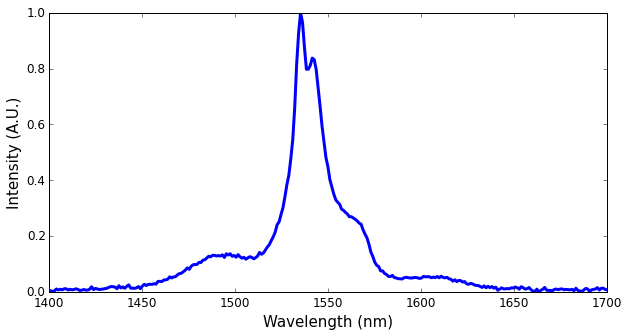

In [8]:
from scipy import signal

# Plot single Spectrum data file
files = gb.glob('./Spectrum/T3.txt')
# files = sorted(files, key=lambda x: int(x[12:-4]))

# Plot data
fig = plt.figure(figsize=(10.0,5.0))
ax = fig.add_subplot(111)

for f in files:
    # Load data
    spectrumData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
    wavelength = spectrumData[:,0]
    intensity = spectrumData[:,1]
    
    ax.plot(wavelength, (intensity-min(intensity))/max(intensity-min(intensity)), label=f, linewidth=3)
    peakind = signal.find_peaks_cwt(intensity,np.arange(1,10))
    
# plt.legend(prop={'size': 12}, ncol=3)
plt.xlabel('Wavelength (nm)', size=15)
plt.ylabel('Intensity (A.U.)', size=15)
plt.yticks(size=12); plt.xticks(size=12)
plt.xlim(1400,1700)
# plt.title('Spectrum of T-series samples')
fig.savefig('spectrum_T9.png', dpi=300)

In [75]:
wavelength[peakind]

array([ 1404.15,  1424.1 ,  1435.65,  1488.15,  1535.4 ,  1536.45,
        1543.8 ,  1567.95,  1612.05,  1622.55,  1654.05,  1697.1 ])

,Number,Series,MaxIntensity,TotalIntensity
T1,1,T,168200,15500290
T10,10,T,244500,19032270
T11,11,T,263400,20454230
T12,12,T,402600,27396020
T13,13,T,178100,17651150


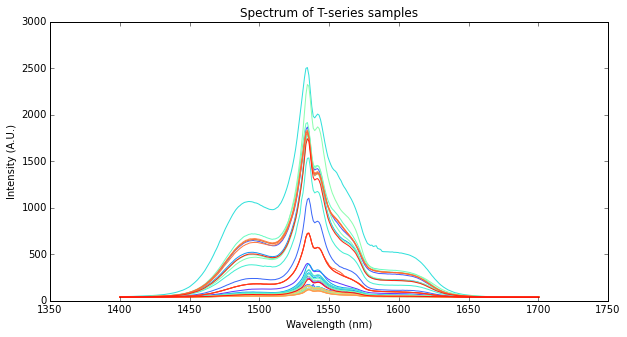

In [22]:
# Plot Spectrum and add data to dataframe
files = gb.glob('./Spectrum/*.txt')
# files = sorted(files, key=lambda x: int(x[12:-4]))

# Import colorbar
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = len(files)
cm = plt.get_cmap('rainbow')
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLORS)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

# Plot data
fig = plt.figure()
fig = plt.figure(figsize=(10.0,5.0))
ax = fig.add_subplot(111)
ax.set_color_cycle([scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

imax = []
itot = []; name = []
for f in files:
    # Load data
    spectrumData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
    wavelength = spectrumData[:,0]
    intensity = spectrumData[:,1]
    
    # Get sample
    sample = os.path.split(f)[1]
    sample = sample[:-4]
    
    # Store max intensity to dataframe
    imax.append(max(intensity))
    itot.append(sum(intensity))
    name.append(sample)
    
    ax.plot(wavelength, intensity/1000, label=sample)

df['MaxIntensity'] = pd.Series(imax,index=name)    
df['TotalIntensity'] = pd.Series(itot,index=name)    

    
# plt.legend(prop={'size': 12}, ncol=3, loc='best')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (A.U.)')
plt.title('Spectrum of T-series samples')
# fig.savefig('spectrum.png')
# plt.show()
df.head()

# Plot Lifetimes

In [3]:
# Lifetime function
from scipy.optimize import curve_fit

def model_func(t, a, b, c):
    return a*np.exp(-t/b)+c

def getLifetime(time, intensity, f):
    try:
        guess = [max(intensity), 10, min(intensity)]
        popt, pcov = curve_fit(model_func, time, intensity, guess)
#         print('All Ok')
        return popt[1]
    except:
        print(f + ' did not fit a single exp :(')
        return np.NaN

In [4]:
# Load lifetime files function
def loadLifetime(pump, units):
    ext = str(pump) + units
    
    if units == 'us':
        pump = pump*0.001  # converts to ms
    
    files = gb.glob('./Lifetime/*_%s.txt'% ext)
    endFile = -(len(ext)+ len('_.txt'))
    files = sorted(files, key=lambda x: int(x[12:endFile]))
    
    name = []; decay = [];
    for f in files:
        spectrumData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=22, usecols=(0,1))

        # Get sample name
        sample = os.path.split(f)[1]
        sample = sample.split('_')[0]
        name.append(sample)
#         print('Analysing sample '+ sample)
        
        # Get lifetimes
        time = spectrumData[:,0]/1E6  # Convert to ms
        intensity = spectrumData[:,1]
        ind = np.where(time >= pump)
        tau = getLifetime(time[ind], intensity[ind], f)
        
        decay.append(tau)

    return pd.Series(decay,index=name) 

In [6]:
# Store decays into dataframe
df['Lifetime_100us'] = loadLifetime(100,'us') 
# df['Lifetime_2ms'] = loadLifetime(2,'ms')
# df['Lifetime_100ms'] = loadLifetime(100,'ms')

## 100us Pump

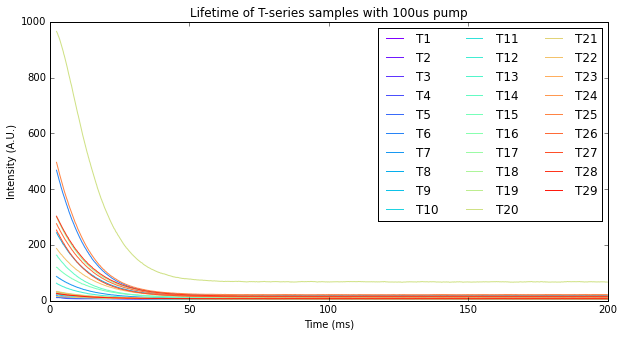

In [12]:
nm = '100us' # Pump time
files = gb.glob('./Lifetime/*_%s.txt'% nm)
endFile = -(len(nm)+ len('_.txt'))
files = sorted(files, key=lambda x: int(x[12:endFile]))

# Import colorbar
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = len(files)
cm = plt.get_cmap('rainbow')
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLORS)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

# Plot data
fig = plt.figure()
fig = plt.figure(figsize=(10.0,5.0))
ax = fig.add_subplot(111)
ax.set_color_cycle([scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

for f in files:
    # Load data
    spectrumData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
    time = spectrumData[:,0]/1E6  # Convert to ms
    intensity = spectrumData[:,1]
    
    # Get sample name
    sample = os.path.split(f)[1]
    sample = sample.split('_')[0]

    ax.plot(time, intensity/1000, label=sample)

plt.legend(prop={'size': 12}, ncol=3)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (A.U.)')
plt.title('Lifetime of T-series samples with %s pump' % nm)
# fig.savefig('spectrum.png')
# plt.show()

In [14]:
df.head(10)
#plot
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(df['Number'], df['Lifetime_100us'], '-o', label='100us')
# ax.plot(df['Number'], df['Lifetime_2ms'], '-o', label='2ms')
# ax.plot(df['Number'], df['Lifetime_100ms'], '-o', label='100ms')
# plt.legend(loc='best')
# plt.xlabel('Sample Number (T#)')
# plt.ylabel('Decay (ms)')
# plt.tight_layout()

,Number,Series,MaxIntensity,TotalIntensity,Lifetime_100us,Lifetime_2ms,Lifetime_100ms
T1,1,T,168200,15500290,12.582230,13.268971,15.460162
T2,2,T,165300,15583850,12.478842,12.867879,15.012790
T3,3,T,132600,14499530,12.041918,12.489060,14.859698
T4,4,T,160600,16723680,1.541386,1.512246,NaN
T5,5,T,119400,14065800,12.971974,13.281922,15.131072
T6,6,T,1837000,106562600,10.131770,19.791586,17.812902
T7,7,T,729200,39020060,10.870046,13.886550,16.525283
T8,8,T,1743000,87668060,11.664499,20.128905,23.087895
T9,9,T,234000,17762840,12.436521,13.233977,15.914863
T10,10,T,244500,19032270,10.742143,11.706400,13.782935


## 2ms Pump

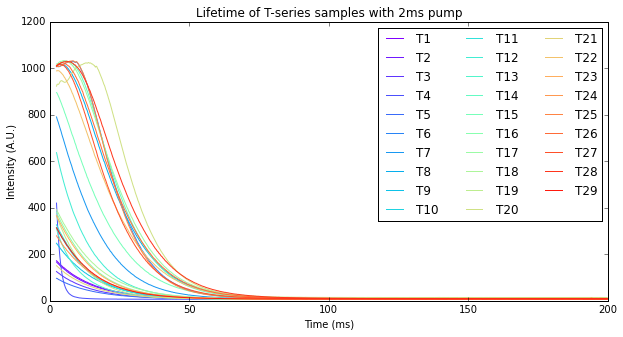

In [15]:
nm = '2' # Pump time
files = gb.glob('./Lifetime/*_%sms.txt'% nm)
endFile = -(len(nm)+ len('_ms.txt'))
files = sorted(files, key=lambda x: int(x[12:endFile]))

# Import colorbar
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = len(files)
cm = plt.get_cmap('rainbow')
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLORS)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

# Plot data
fig = plt.figure()
fig = plt.figure(figsize=(10.0,5.0))
ax = fig.add_subplot(111)
ax.set_color_cycle([scalarMap.to_rgba(i) for i in range(NUM_COLORS)])


for f in files:
    # Load data
    spectrumData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
    time = spectrumData[:,0]/1E6  # Convert to ms
    intensity = spectrumData[:,1]
    
    # Get sample name
    sample = os.path.split(f)[1]
    sample = sample.split('_')[0]
    
    ax.plot(time, intensity/1000, label=sample)

plt.legend(prop={'size': 12}, ncol=3)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (A.U.)')
plt.title('Lifetime of T-series samples with %sms pump' % nm)
# fig.savefig('spectrum.png')
# plt.show()

## 100ms pump

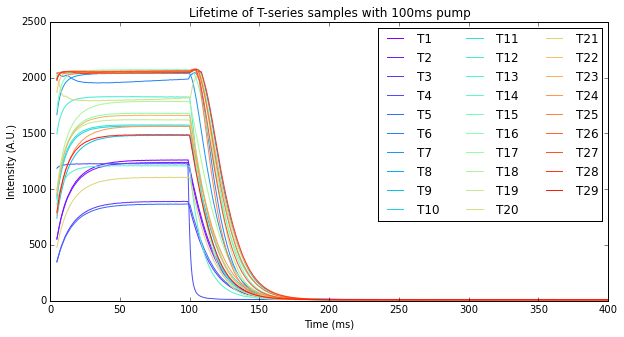

In [16]:
nm = '100' # Pump time
files = gb.glob('./Lifetime/*_%sms.txt'% nm)
endFile = -(len(nm)+ len('_ms.txt'))
files = sorted(files, key=lambda x: int(x[12:endFile]))

# Import colorbar
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = len(files)
cm = plt.get_cmap('rainbow')
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLORS)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

# Plot data
fig = plt.figure()
fig = plt.figure(figsize=(10.0,5.0))
ax = fig.add_subplot(111)
ax.set_color_cycle([scalarMap.to_rgba(i) for i in range(NUM_COLORS)])


for f in files:
    # Load data
    spectrumData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
    time = spectrumData[:,0]/1E6  # Convert to ms
    intensity = spectrumData[:,1]
    
    # Get sample name
    sample = os.path.split(f)[1]
    sample = sample.split('_')[0]
    
    ax.plot(time, intensity/1000, label=sample)

plt.legend(prop={'size': 12}, ncol=3)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (A.U.)')
plt.title('Lifetime of T-series samples with %sms pump' % nm)
# fig.savefig('spectrum.png')
# plt.show()

### Plot decay after pump

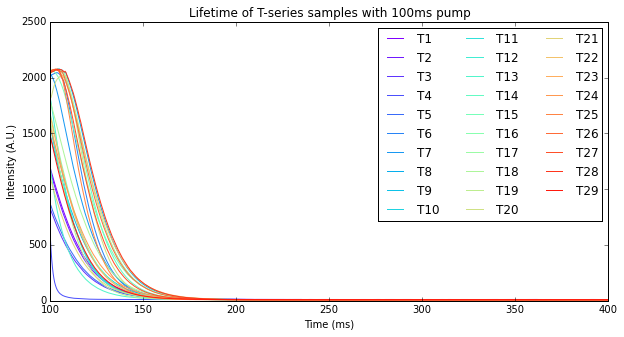

In [17]:
nm = '100' # Pump time
files = gb.glob('./Lifetime/*_%sms.txt'% nm)
endFile = -(len(nm)+ len('_ms.txt'))
files = sorted(files, key=lambda x: int(x[12:endFile]))

# Import colorbar
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = len(files)
cm = plt.get_cmap('rainbow')
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLORS)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

# Plot data
fig = plt.figure()
fig = plt.figure(figsize=(10.0,5.0))
ax = fig.add_subplot(111)
ax.set_color_cycle([scalarMap.to_rgba(i) for i in range(NUM_COLORS)])


for f in files:
    # Load data
    spectrumData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
    time = spectrumData[:,0]/1E6  # Convert to ms
    intensity = spectrumData[:,1]
    
    # Get sample name
    sample = os.path.split(f)[1]
    sample = sample.split('_')[0]
    
    ind = np.where(time >= 100) #  Find location of when time after the pump
    ax.plot(time[ind], intensity[ind]/1000, label=sample)

plt.legend(prop={'size': 12}, ncol=3)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (A.U.)')
plt.title('Lifetime of T-series samples with %sms pump' % nm)
# fig.savefig('spectrum.png')
# plt.show()

# Pandas Dataframe

In [ ]:
# Add Raw data to dataframe (spectrum and lifetime)
files = gb.glob('./Spectrum/*.txt')
files = sorted(files, key=lambda x: int(x[12:-4]))

# Get Spectrum data
spectrum = []
for f in files:
    # Load data
    spectrumData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
    wavelength = spectrumData[:,0]
    intensity = spectrumData[:,1]
    spectrum.append(spectrumData)

# Get lifetime data
nm = '100us' # Pump time
files = gb.glob('./Lifetime/*_%s.txt'% nm)
endFile = -(len(nm)+ len('_.txt'))
files = sorted(files, key=lambda x: int(x[12:endFile]))

decay = []; name = []; lifetime = [];
pump = 0.1  # in ms
ind = np.where(time >= pump)

for f in files:
    # Load data
    lifetimeData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
    lifetime.append(lifetimeData)
    
    time = spectrumData[:,0]/1E6  # Convert to ms
    intensity = spectrumData[:,1]
    decay.append(getLifetime(time[ind], intensity[ind]))

    # Get sample name
    sampleD = os.path.split(f)[1]
    sampleD = sampleD.split('_')[0]

# Add to dataframe
df = pd.DataFrame({'Spectrum': spectrum}, index=sample)
df = pd.DataFrame({'Lifetime': lifetime}, index=sampleD)

In [ ]:
df.head()

In [ ]:
df.Lifetime[:][1].shape

In [ ]:
# Import colorbar
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = len(files)
cm = plt.get_cmap('rainbow')
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLORS)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

# Plot data
fig = plt.figure()
fig = plt.figure(figsize=(10.0,5.0))
ax = fig.add_subplot(111)
ax.set_color_cycle([scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

for i in range(len(df.index)):
    plt.plot(df.spectrum[i][:,0], df.spectrum[i][:,1], label=df.index[i])

plt.legend(prop={'size': 12}, ncol=3)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (A.U.)')
plt.title('Spectrum of T-series samples')

In [ ]:
from scipy.signal import argrelmax
wavelength[argrelmax(intensity, order=5)]

In [ ]:
# Save Dataframe
df.to_csv('dataframe.csv')
# To load
# pd.read_csv('dataframe.csv', index_col=0) 